In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew

# Analyze The Data 

In [3]:
df= pd.read_csv('Property_data.csv')
df

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.head()

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.tail()

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

In [7]:
df.columns

Index(['PropertyID', 'PropertyClass', 'PropertyZone', 'PropertyFrontage',
       'PropertySize', 'Street', 'Alley', 'PropertyShape', 'Elevation',
       'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'PropertyStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingType', 'ExteriorCladdingArea',
       'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish',
       'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinSty1',
       'BsmntFinQual1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', 'Heating',
       'HeatingEfficiency', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1',
       'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'QualFireplace', 'BasementType',
       'BasementYrBlt

In [8]:
df.describe()

,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinSty1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,PropPrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning 

In [4]:
df.isnull()

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


**Filling Null Values**

In [12]:
df['PropertyFrontage'].fillna(df['PropertyFrontage'].mean(), inplace=True)
df['PropertySize'].fillna(df['PropertySize'].mean(), inplace=True)
df['PropertyZone'].fillna(df['PropertyZone'].mean(), inplace=True)
df['PropertyShape'].fillna(df['PropertyShape'].mean(), inplace=True)
df['TotalArea'].fillna(df['TotalArea'].mean(), inplace=True)
df['TotalRooms'].fillna(df['TotalRooms'].mean(), inplace=True)
df['ExteriorCladdingArea'].fillna(df['ExteriorCladdingArea'].mean(), inplace=True)
df['PropertyStyle'].fillna(df['PropertyStyle'].mean(), inplace=True)
df['OverallQual'].fillna(df['OverallQual'].mean(), inplace=True)
df['OverallCond'].fillna(df['OverallCond'].mean(), inplace=True)

# Outlier's Analysis

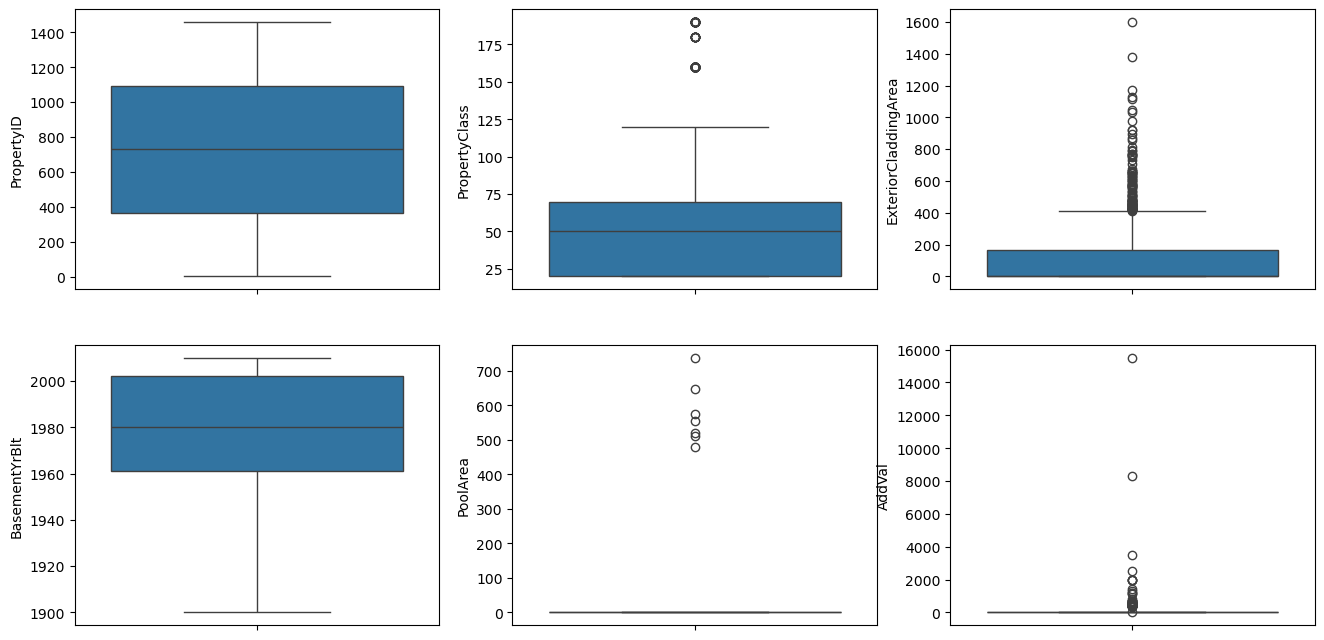

In [13]:
fig, axs = plt.subplots(2,3, figsize = (16,8))
plt1 = sns.boxplot(df['PropertyID'], ax = axs[0,0])
plt2 = sns.boxplot(df['PropertyClass'], ax = axs[0,1])
plt3 = sns.boxplot(df['ExteriorCladdingArea'], ax = axs[0,2])
plt4 = sns.boxplot(df['BasementYrBlt'], ax = axs[1,0])
plt5 = sns.boxplot(df['PoolArea'], ax = axs[1,1])
plt6 = sns.boxplot(df['AddVal'], ax = axs[1,2])

**Outlier Treatment**

**Interpretation**

In [12]:
# ExteriorCladdingArea ,PoolArea and Addval have considerable outliers.
# we can drop the outliers as we have sufficient data.

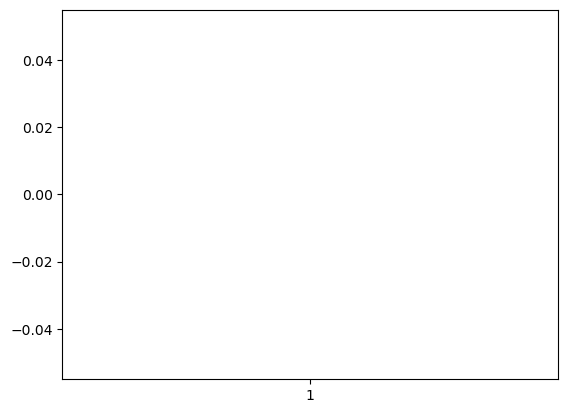

In [13]:
# outlier treatment for ExteriorCladdingArea
plt.boxplot(df['ExteriorCladdingArea'])
Q1 = df['ExteriorCladdingArea'].quantile(0.25)
Q3 = df['ExteriorCladdingArea'].quantile(0.75)
IQR = Q3 - Q1
ExteriorCladdingArea = df[(df['ExteriorCladdingArea'] >= Q1 - 1.5*IQR) & (df['ExteriorCladdingArea'] <= Q3 + 1.5*IQR)]


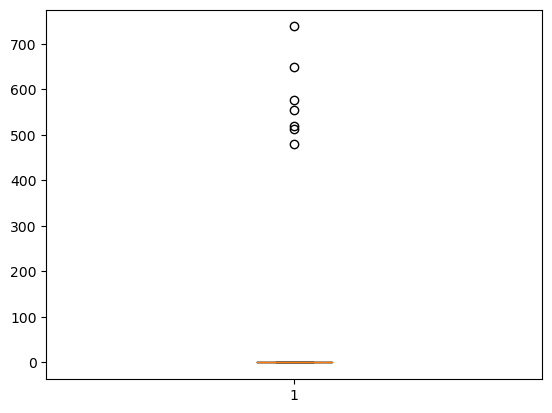

In [14]:
# outlier treatment for PoolArea
plt.boxplot(df.PoolArea)
Q1 = df.PoolArea.quantile(0.25)
Q3 = df.PoolArea.quantile(0.75)
IQR = Q3 - Q1
PoolArea = df[(df.PoolArea >= Q1 - 1.5*IQR) & (df.PoolArea <= Q3 + 1.5*IQR)]

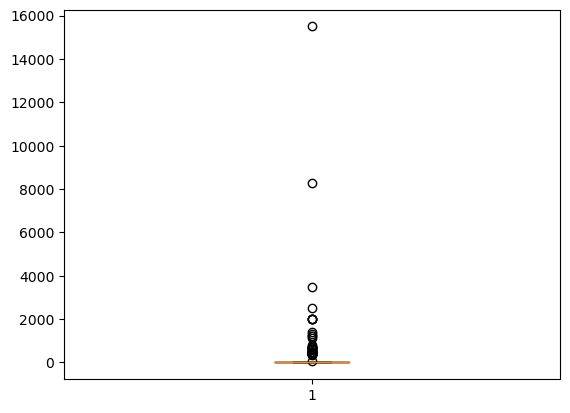

In [15]:
# outlier treatment for AddVal
plt.boxplot(df.AddVal)
Q1 = df.AddVal.quantile(0.25)
Q3 = df.AddVal.quantile(0.75)
IQR = Q3 - Q1
AddVal = df[(df.AddVal >= Q1 - 1.5*IQR) & (df.AddVal <= Q3 + 1.5*IQR)]

# Identify Ordinal And Nominal Column's

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each column with string data
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [7]:
df

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [18]:
df.isnull().sum() # There is No Null Value In Data 

PropertyID          0
PropertyClass       0
PropertyZone        0
PropertyFrontage    0
PropertySize        0
                   ..
SaleMon             0
SaleYr              0
SaleType            0
SaleCondn           0
PropPrice           0
Length: 81, dtype: int64

# Exploratory Data Analysis 

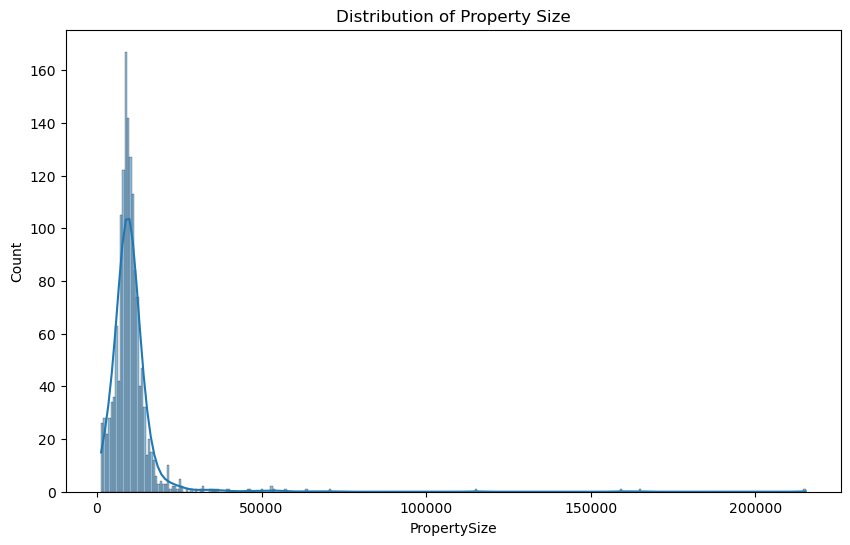

In [19]:
#This Histograph Visualize the proper Distribution of Property Size
plt.figure(figsize=(10, 6))
sns.histplot(df['PropertySize'], kde=True)
plt.title('Distribution of Property Size')
plt.show()

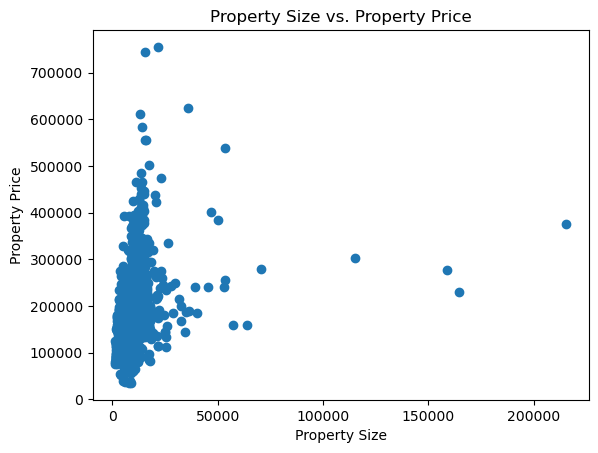

In [20]:
#This Scatter Plot  show's the relation between the "PropertySize" and "Property Price"
plt.scatter(df['PropertySize'], df['PropPrice'])
plt.title('Property Size vs. Property Price')
plt.xlabel('Property Size')
plt.ylabel('Property Price')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21416\1658961160.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='SaleMon', y='PropPrice', data=df, ci=None)


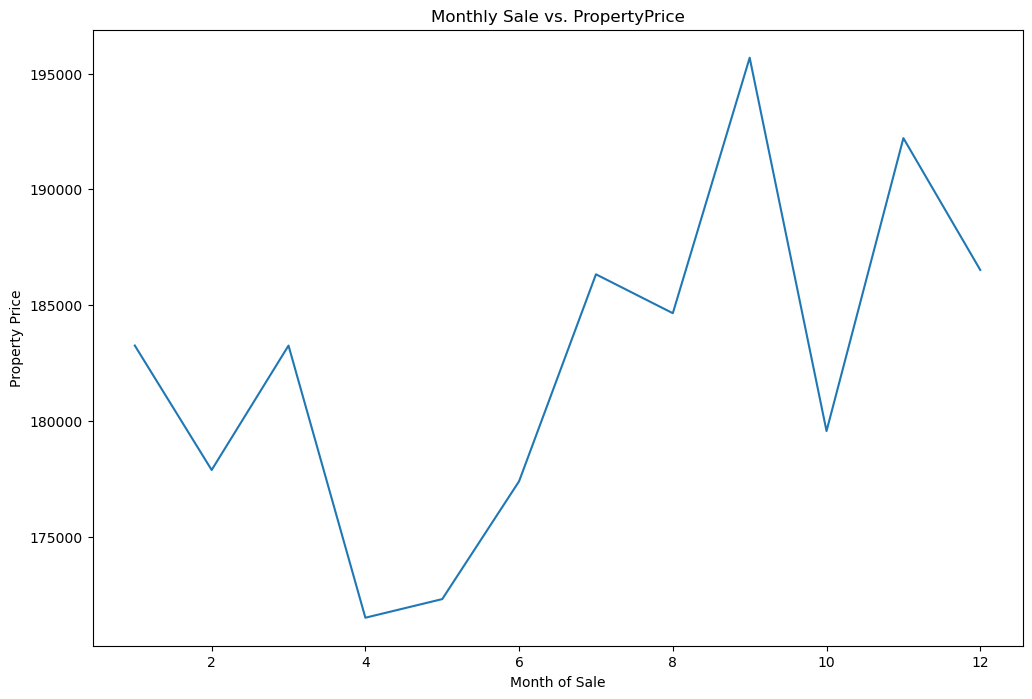

In [21]:
#This line graph show's the relation between the "monthly Sale" and "Property Price"
plt.figure(figsize=(12, 8))
sns.lineplot(x='SaleMon', y='PropPrice', data=df, ci=None)
plt.title('Monthly Sale vs. PropertyPrice')
plt.xlabel('Month of Sale')
plt.ylabel('Property Price')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21416\938452589.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='SaleYr', y='PropPrice', data=df, ci=None)


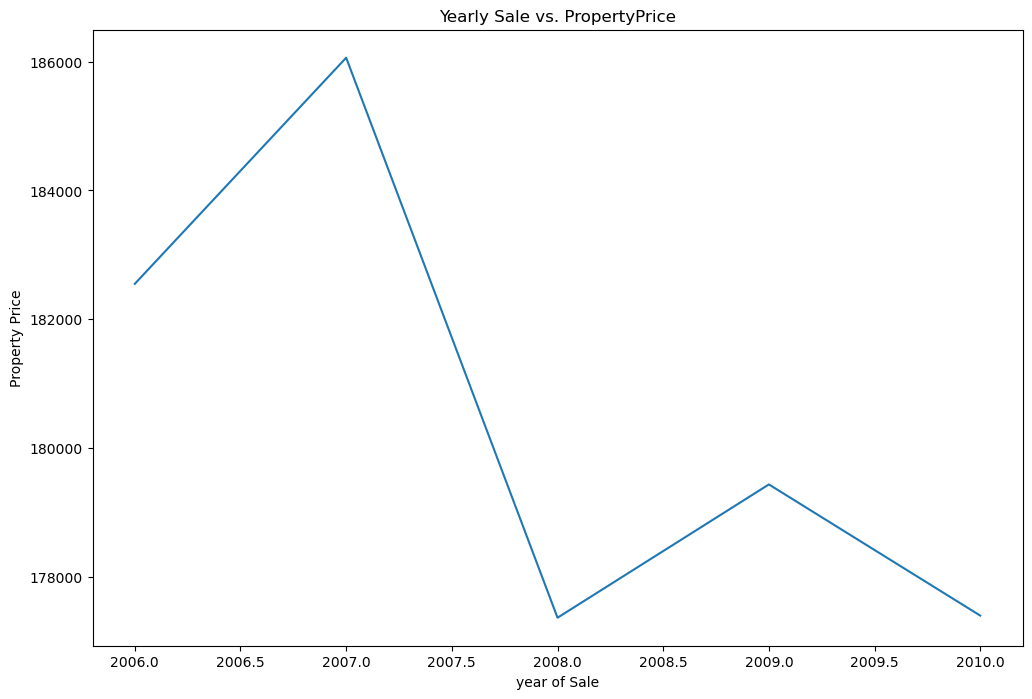

In [22]:
#This line graph show's the relation between the "monthly Sale" and "Property Price"
plt.figure(figsize=(12, 8))
sns.lineplot(x='SaleYr', y='PropPrice', data=df, ci=None)
plt.title('Yearly Sale vs. PropertyPrice')
plt.xlabel('year of Sale')
plt.ylabel('Property Price')
plt.show()

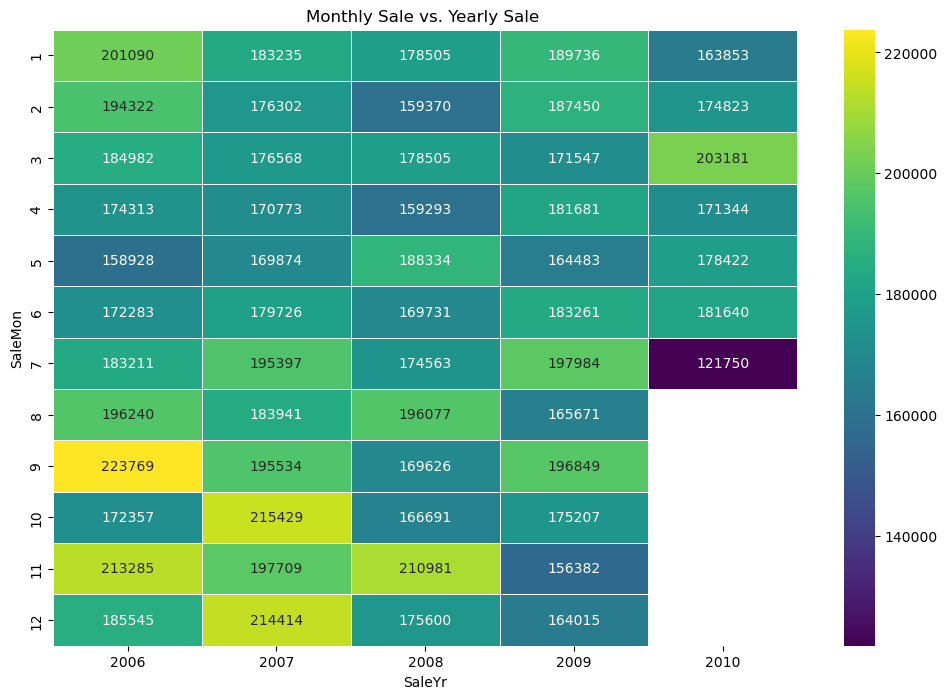

In [23]:
#This Heat Map show's the relation between the "monthly Sale" and "Yearly Sale"
plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(values='PropPrice', index='SaleMon', columns='SaleYr', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Monthly Sale vs. Yearly Sale ')
plt.show()

# Feature Engineering

**Correlation Matrix**

In [9]:
correlation_matrix = df.corr()
correlation_matrix

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
PropertyID,1.000000,0.011156,-0.006096,-0.009601,-0.033226,0.008916,-0.001530,0.032122,-0.019659,1.332409e-02,...,0.057044,-0.033928,-0.000399,0.037057,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
PropertyClass,0.011156,1.000000,0.035900,-0.357056,-0.139781,-0.024969,-0.105995,0.119289,-0.002940,-2.284384e-02,...,0.008283,-0.005221,0.086360,0.034859,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
PropertyZone,-0.006096,0.035900,1.000000,-0.106363,-0.034452,0.087654,-0.052039,0.061887,-0.017854,-1.192034e-03,...,-0.003128,0.002882,-0.061289,0.000673,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
PropertyFrontage,-0.009601,-0.357056,-0.106363,1.000000,0.306795,-0.037323,0.133433,-0.144931,-0.075647,-5.447825e-18,...,0.180868,-0.191630,-0.036751,-0.005395,0.001168,0.010158,0.006768,-0.030846,0.058464,0.334901
PropertySize,-0.033226,-0.139781,-0.034452,0.306795,1.000000,-0.197131,0.060105,-0.165315,-0.149083,1.012318e-02,...,0.077672,-0.065167,0.036031,-0.103544,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleMon,0.021172,-0.013585,-0.031496,0.010158,0.001205,0.003690,0.013094,-0.033455,-0.011599,-5.155166e-02,...,-0.033737,0.036368,-0.009892,-0.014193,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
SaleYr,0.000712,-0.021407,-0.020628,0.006768,-0.014261,-0.025043,0.020944,0.036449,0.020507,2.335254e-02,...,-0.059689,0.060904,-0.035366,-0.055962,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.030846,0.012292,0.014339,0.008205,-0.000911,-0.025754,-1.267697e-01,...,0.011009,-0.013592,-0.006154,-0.003311,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondn,-0.005806,-0.024940,0.009494,0.058464,0.034169,0.006064,0.035717,-0.038118,0.033809,-8.970068e-02,...,-0.067251,0.097425,0.100675,0.003192,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


***Calculate Skewness***

In [15]:
skewness = skew(df['PropPrice'])

print(f"Skewness: {skewness}")


Skewness: 1.880940746034036


**Skewness Value: 1.88**

**Interpretation: Positive skewness indicates a rightward or positive tail. In the context of property prices, this suggests that there may be a concentration of lower-valued properties with a few higher-valued properties contributing to the longer right tail of the distribution.**

# Feature Building

*Create new features, such as the season or quarter in which the property was sold.*

In [33]:
df['SaleMon'] = df['SaleMon'].astype(str).str.zfill(2)
df['SaleYr'] = df['SaleYr'].astype(str)

In [28]:
# Convert 'YearBuilt', 'YearRemodAdd', and 'SaleYr' to datetime format
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'])
df['YearRemodAdd'] = pd.to_datetime(df['YearRemodAdd'])
df['SaleYr'] = pd.to_datetime(df['SaleYr'], format='%Y')

# Calculate the age of the property at the time of sale
df['AgeAtSale'] = (df['SaleYr'] - df['YearBuilt']).dt.days // 365

# Calculate the number of years since the last remodel at the time of sale
df['YearsSinceRemodel'] = (df['SaleYr'] - df['YearRemodAdd']).dt.days // 365


In [ ]:
seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}

df['SeasonOfSale'] = df['SaleMon'].map(seasons)

# Combine 'SaleYr' and 'SaleMon' into a valid datetime format
df['SaleDate'] = pd.to_datetime(df['SaleYr'] + '-' + df['SaleMon'] + '-01', format='%Y-%d-%m')

# Create a new feature for the quarter of sale
df['QuarterOfSale'] = df['SaleDate'].dt.to_period('Q')

In [34]:
df

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice,AgeAtSale,YearsSinceRemodel,SeasonOfSale
0,1,60,3,65.0,8450,1,2,3,3,0,...,4,0,02,2008-01-01,8,4,208500,38,38,Winter
1,2,20,3,80.0,9600,1,2,3,3,0,...,4,0,05,2007-01-01,8,4,181500,37,37,Spring
2,3,60,3,68.0,11250,1,2,0,3,0,...,4,0,09,2008-01-01,8,4,223500,38,38,Fall
3,4,70,3,60.0,9550,1,2,0,3,0,...,4,0,02,2006-01-01,8,0,140000,36,36,Winter
4,5,60,3,84.0,14260,1,2,0,3,0,...,4,0,12,2008-01-01,8,4,250000,38,38,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,4,0,08,2007-01-01,8,4,175000,37,37,Summer
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,4,0,02,2010-01-01,8,4,210000,40,40,Winter
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,2,2500,05,2010-01-01,8,4,266500,40,40,Spring
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,4,0,04,2010-01-01,8,4,142125,40,40,Spring


# Interpretation


**The feature engineering process enhances the dataset by introducing new variables that provide meaningful insights for property price prediction.**

# Combining Total Square Footage

In [10]:
# Create a new feature for the total area
df['TotalArea'] = df['BsmtUnfSF'] + df['BsmntSqFtage'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalArea']

0       2716
1       2808
2       3140
3       3013
4       3833
        ... 
1455    3553
1456    4204
1457    4369
1458    2156
1459    2648
Name: TotalArea, Length: 1460, dtype: int64

# Combining Total Rooms

In [11]:
# Create a new feature for the total number of rooms
df['TotalRooms'] = df['BedroomUpLev'] + df['KitchenUpLev'] + df['CntRmsUpLev']
df['TotalRooms']

0       12
1       10
2       10
3       11
4       14
        ..
1455    11
1456    11
1457    14
1458     8
1459    10
Name: TotalRooms, Length: 1460, dtype: int64

# Regression Analysis

# X & Y ARRAY

In [69]:
X = df[['PropertySize','PropertyZone','PropertyShape','TotalArea','TotalRooms','ExteriorCladdingArea','PropertyStyle','OverallQual','OverallCond']]  # Predictor variable
y = df['PropPrice']        # Target variable

*****Splitting Dataset into Training and Testing*****

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*****Creating & Training Linear Regression Model*****

In [71]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

model.score(X_test,y_test)

0.7613017952834319

***Creating & Training Random Tree Model***

In [73]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [74]:
rfc.score(X_test,y_test)

0.00684931506849315

***Evaluation of the model***

In [75]:
# MEAN SQUARED ERROR
mse = mean_squared_error(y_test, predictions)
mse

1830893095.2460098

In [76]:
#MEAN ABSOLUTE ERROR
mae = mean_absolute_error(y_test, predictions)
mae

27543.823519220427

In [77]:
r2 = r2_score(y_test, predictions)
r2

0.7613017952834319

# Interpretation 

**1.Linear Regression Model Perform's Well**


**2.The R-squared score of approximately 0.76 indicates that the linear regression model explains about 76% of the variability in property prices using the selected features.** 